# Importing Relavent Liabraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

# Loading the Data

In [3]:
raw_data=pd.read_csv('startups_data.csv')
raw_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,78051.14365,55537.75251,12770.82,New York,54575.486170
1,11163.47269,241608.96630,55012.62,New York,-6257.430253
2,153848.90340,169007.95040,46708.68,Florida,86707.726460
3,46913.23785,55770.16760,222415.30,California,36073.618930
4,16844.34943,116066.11220,164528.39,California,24696.317850


In [4]:
raw_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
raw_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,400.000000,400.000000,400.000000,400.000000
mean,80965.478413,142435.708365,119887.684200,54356.336059
std,47668.448443,61451.490115,69125.748567,38805.158844
min,1315.460000,0.000000,-347.000000,-30287.795920
25%,40603.498222,93765.670533,63166.127500,23935.551690
50%,74292.618905,140513.882500,118074.450000,52664.410385
75%,123962.329650,174979.059075,175931.267500,86480.912705
max,165169.886800,282311.018900,304981.620000,149759.960000


# Exploring The Data

C:\Users\Avneesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

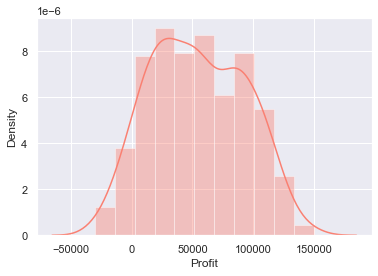

In [6]:
sns.distplot(raw_data['Profit'],color='salmon')

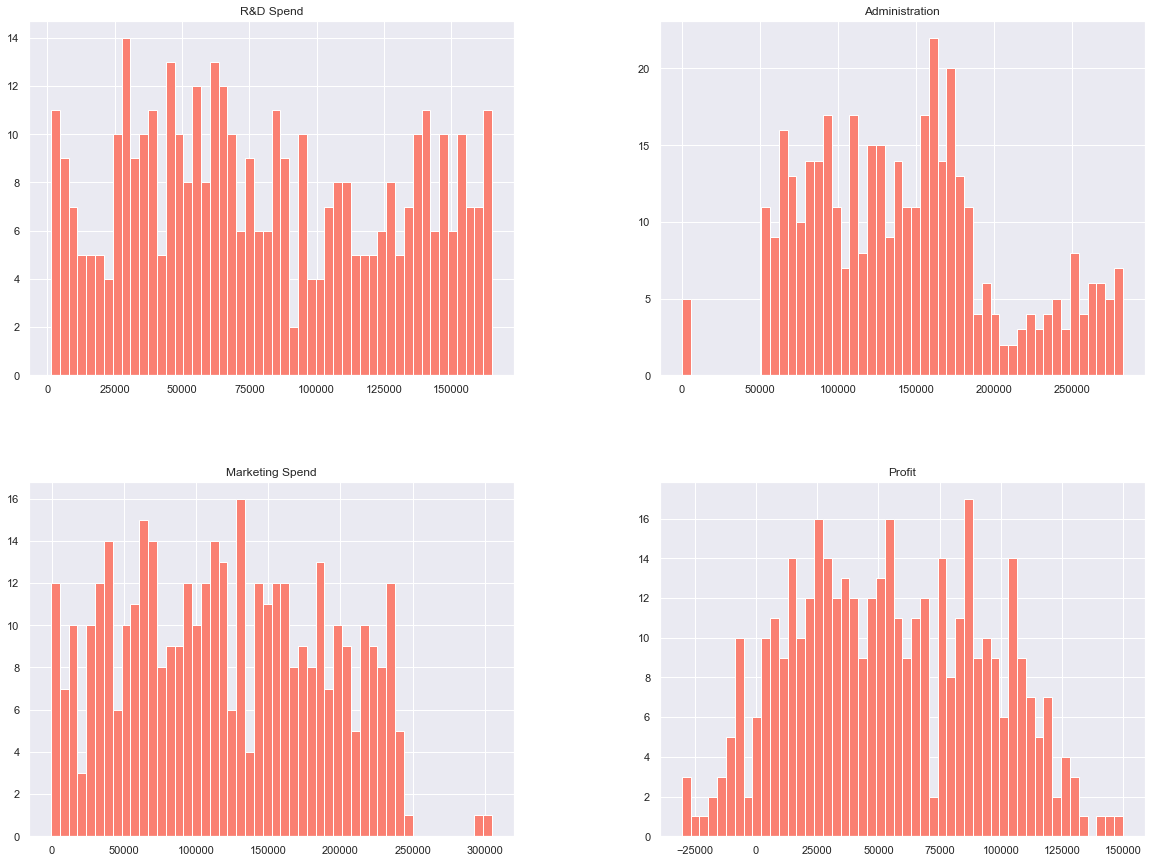

In [7]:
# Plot histogram of features
import matplotlib.pyplot as plt
raw_data.hist(bins=50, figsize=(20,15),color='salmon')
plt.show()

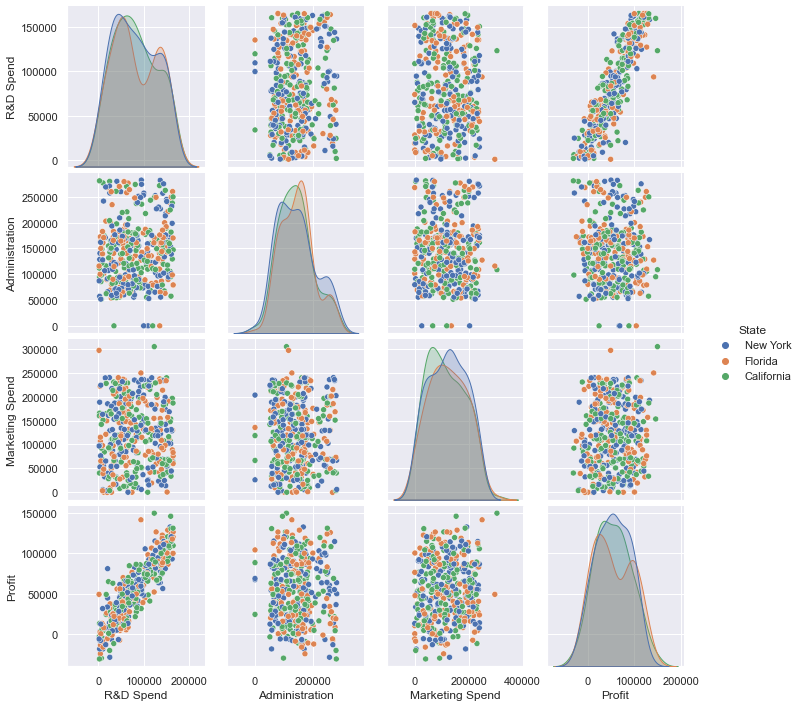

In [8]:
sns.pairplot(raw_data,hue='State')

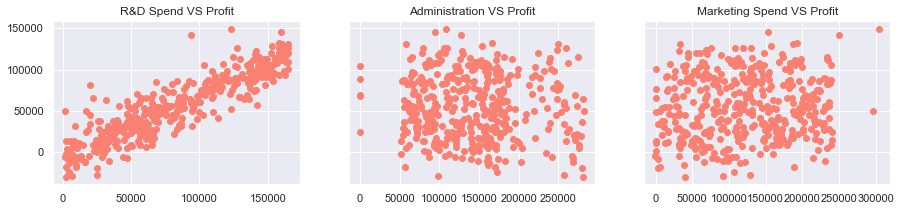

In [9]:
## cheacking the linearity of the dataset
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(raw_data['R&D Spend'],raw_data['Profit'],color='salmon')
ax1.set_title('R&D Spend VS Profit')
ax2.scatter(raw_data['Administration'],raw_data['Profit'],color='salmon')
ax2.set_title('Administration VS Profit')
ax3.scatter(raw_data['Marketing Spend'],raw_data['Profit'],color='salmon')
ax3.set_title('Marketing Spend VS Profit')
plt.show()

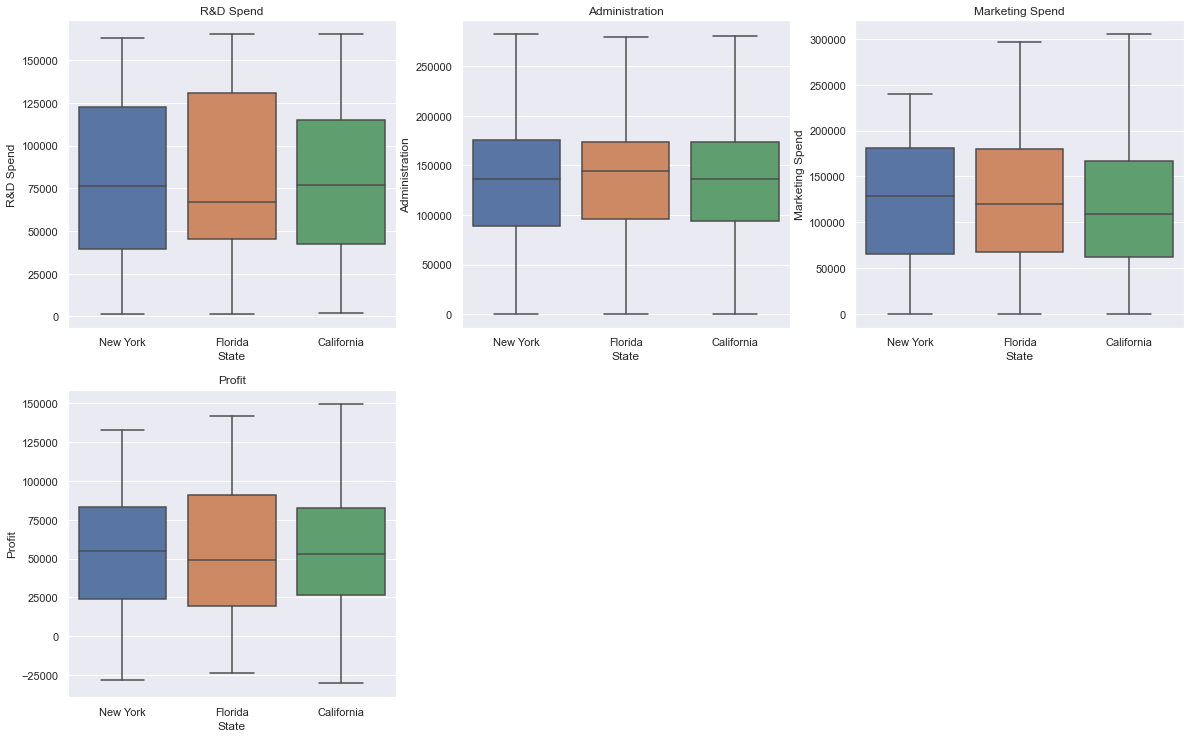

In [10]:
N_col = ['R&D Spend','Administration','Marketing Spend','Profit']
plt.figure(figsize=(20,60), facecolor='white')
plotnum=1
for col in N_col:
    ax=plt.subplot(9,3,plotnum)
    sns.boxplot(y=raw_data[col],x=raw_data['State'])
    plt.title(col)
    plotnum+=1
plt.show()

<AxesSubplot:>

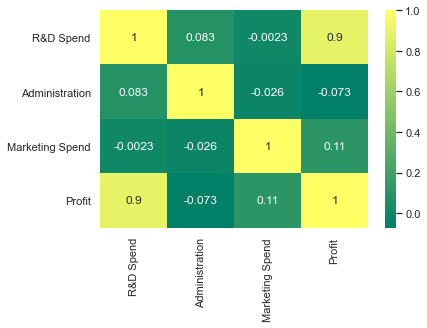

In [11]:
# checking for correlations
c=raw_data.corr()
sns.heatmap(c,annot=True,cmap='summer')

In [12]:
#checking for correlation
raw_data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.082627,-0.002324,0.898778
Administration,0.082627,1.000000,-0.026040,-0.072618
Marketing Spend,-0.002324,-0.026040,1.000000,0.110459
Profit,0.898778,-0.072618,0.110459,1.000000


In [13]:
## checking for Multicollinearity using VIF(Varience Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=raw_data[['R&D Spend','Administration','Marketing Spend']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]
vif['Features']=variables.columns

In [14]:
vif
#Administrarion is perfectly ok whereas R&D Spend and Marketing Spend are little bit correlated 

,VIF,Features
0,3.164354,R&D Spend
1,3.739020,Administration
2,2.927782,Marketing Spend


# Data Preprocessing

### Dealing with null values

In [15]:
print("Proportion of missing values")
missing_percentage = (raw_data==0).sum()*100/raw_data.shape[0]
missing_percentage

Proportion of missing values


R&D Spend          0.00
Administration     1.25
Marketing Spend    1.25
State              0.00
Profit             0.00
dtype: float64

In [16]:
#let us observe if their is any dependency of missing values in R&D other columns
print("Count of zeros in Administration:", (raw_data['Administration']==0).sum())
print("Count of zeros in R&D Spend:", (raw_data['R&D Spend']==0).sum())
print("Count of zeros in Marketing Spend:", (raw_data['Marketing Spend']==0).sum())

Count of zeros in Administration: 5
Count of zeros in R&D Spend: 0
Count of zeros in Marketing Spend: 5


In [17]:
# replacing the 0 values with NaN
m_col = ['R&D Spend','Administration','Marketing Spend']
colnum=1
for col in m_col:
    raw_data[col]=raw_data[col].replace(0,np.nan)
    colnum+=1
raw_data.isnull().sum()/raw_data.shape[0]

R&D Spend          0.0000
Administration     0.0125
Marketing Spend    0.0125
State              0.0000
Profit             0.0000
dtype: float64

In [18]:
raw_data[raw_data.isna().any(axis=1)]

,R&D Spend,Administration,Marketing Spend,State,Profit
52,135386.45370,NaN,135645.11,Florida,104385.916700
67,11771.65642,101379.66050,NaN,Florida,10770.949280
108,34268.28870,NaN,66565.93,California,24751.975280
109,28672.57672,80280.65762,NaN,Florida,899.339551
143,109681.80090,NaN,26008.99,New York,67584.953650
190,74135.90494,129251.08620,NaN,Florida,76662.235650
246,99911.38668,NaN,203520.82,New York,69106.834470
256,119859.00390,NaN,118676.18,California,88706.941440
278,108864.98620,109713.92950,NaN,California,65803.315950
393,65288.16876,79644.98550,NaN,New York,13574.044390


### Creating Dummy Variables

In [19]:
# Before dealing with nan values we must create dummy variables
data1=pd.get_dummies(raw_data,drop_first=True)
data1.describe(include='all')

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
count,400.000000,395.000000,395.000000,400.000000,400.000000,400.000000
mean,80965.478413,144238.692015,121405.249823,54356.336059,0.317500,0.347500
std,47668.448443,59694.957825,68222.432293,38805.158844,0.466087,0.476773
min,1315.460000,51455.812350,-347.000000,-30287.795920,0.000000,0.000000
25%,40603.498222,94480.632295,64820.900000,23935.551690,0.000000,0.000000
50%,74292.618905,140855.867700,118676.180000,52664.410385,0.000000,0.000000
75%,123962.329650,175563.610800,177525.865000,86480.912705,1.000000,1.000000
max,165169.886800,282311.018900,304981.620000,149759.960000,1.000000,1.000000


## Loading KNNImputer

In [20]:
# Missing records in Market Spend and Marketing Spend is 1.25 % each. We cannot dorp these rows since they may have valuable insight.
# We will now impute the missing values using KNN Imputer.Now that we have Null values in the columns-
import sklearn
from sklearn.impute import KNNImputer,SimpleImputer

In [21]:
data2=data1.drop('State_Florida',axis=1)
data2=data1.drop('State_New York',axis=1)
imputer = KNNImputer(n_neighbors=14)
k_data1=imputer.fit_transform(data1)
data2=pd.DataFrame(k_data1,columns=data1.columns,)
data2.shape

(400, 6)

In [22]:
data2.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
State_Florida      0
State_New York     0
dtype: int64

### Dealing with outliers

In [23]:
# removing the outliers using quantile 

data2 = data2[
            (data2['R&D Spend'] <=data2['R&D Spend'].quantile(.99)) &
            (data2['Administration'] <= data2['Administration'].quantile(.99)) &
            (data2['Marketing Spend'] <= data2['Marketing Spend'].quantile(.99)) &
           
            (data2['R&D Spend'] >= data2['R&D Spend'].quantile(.01)) &
            (data2['Administration'] >= data2['Administration'].quantile(.01)) &
            (data2['Marketing Spend']>= data2['Marketing Spend'].quantile(.01)) 
            
            ]

data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        378 non-null    float64
 1   Administration   378 non-null    float64
 2   Marketing Spend  378 non-null    float64
 3   Profit           378 non-null    float64
 4   State_Florida    378 non-null    float64
 5   State_New York   378 non-null    float64
dtypes: float64(6)
memory usage: 20.7 KB


In [24]:
min_thresold,max_thresold=data2.Profit.quantile([0.01,0.99])
min_thresold,max_thresold

(-18407.3923869, 129263.07156100005)

In [48]:
# Profits of the data (outliers) that have been excluded
data2[data2.Profit<min_thresold]

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
115,6436.286631,98349.68496,92440.54,-29237.73434,0.0,0.0
154,24761.401140,279814.38000,3504.10,-19780.49722,0.0,0.0
162,4176.962120,172505.21100,107002.52,-23909.88132,1.0,0.0
195,25118.019450,257203.74520,129026.03,-28168.35883,0.0,1.0


In [26]:
data2[data2.Profit>max_thresold]

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
20,158277.5166,166878.29300,192569.24,132739.2394,0.0,1.0
130,159672.4039,94943.71992,153456.47,145963.1063,0.0,0.0
275,160380.2522,57436.71106,33590.85,130675.1366,0.0,0.0
380,164837.6512,249755.49580,186792.59,131246.3429,0.0,0.0


In [27]:
data2

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,78051.14365,55537.75251,12770.820000,54575.486170,0.0,1.0
1,11163.47269,241608.96630,55012.620000,-6257.430253,0.0,1.0
2,153848.90340,169007.95040,46708.680000,86707.726460,1.0,0.0
3,46913.23785,55770.16760,222415.300000,36073.618930,0.0,0.0
4,16844.34943,116066.11220,164528.390000,24696.317850,0.0,0.0
...,...,...,...,...,...,...
393,65288.16876,79644.98550,117223.422857,13574.044390,0.0,1.0
395,52507.89524,219465.63110,154298.900000,49793.819410,0.0,0.0
397,34417.44239,114841.49260,74629.180000,22339.883480,1.0,0.0
398,84856.91917,121000.58900,49356.310000,33086.305090,0.0,0.0


In [28]:
data=data2.reset_index(drop=True)

# Multiple Linear Regression Model                             

In [29]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,78051.14365,55537.75251,12770.82,54575.486170,0.0,1.0
1,11163.47269,241608.96630,55012.62,-6257.430253,0.0,1.0
2,153848.90340,169007.95040,46708.68,86707.726460,1.0,0.0
3,46913.23785,55770.16760,222415.30,36073.618930,0.0,0.0
4,16844.34943,116066.11220,164528.39,24696.317850,0.0,0.0


In [30]:
# our data set need some satndardisation
# declaring inputs and Outputs
y=data['Profit']
x1=data.drop('Profit',axis=1)

In [31]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x1)
x_scaled=scaler.transform(x1)

In [32]:
x_scaled.shape

(378, 5)

## Splitting Data for Training and Testing

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=40)

In [34]:
# Creating Regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
# defining the Predicted values
y_train_pred=reg.predict(x_train)
y_test_pred=reg.predict(x_test)

In [36]:
df=pd.DataFrame({'Predicted value':y_test_pred,'Actual Value':y_test})
df

,Predicted value,Actual Value
190,38447.120309,36452.383320
197,4516.796866,2877.360245
102,102125.084583,84585.272050
285,71336.417238,39409.303460
167,108075.143749,104744.166200
...,...,...
27,34662.935230,15539.187410
142,68906.263308,78051.718610
137,111539.416544,105759.402100
217,34365.374979,62224.030070


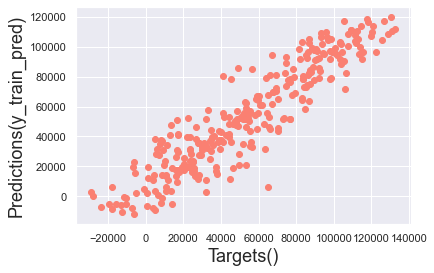

In [37]:
# Plot between Targets and Predictions
plt.scatter(y_train,y_train_pred,color='salmon')
plt.xlabel('Targets()',size=18)
plt.ylabel('Predictions(y_train_pred)',size=18)
plt.show()

##### Our predictions seems to have a linearity with targets which is exactly what we need 

C:\Users\Avneesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals.PDF')

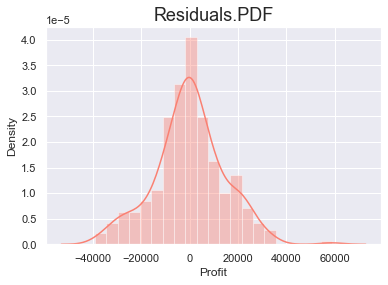

In [44]:
sns.distplot(y_train-y_train_pred,color='salmon')
plt.title("Residuals.PDF",size=18)

##### Residuals(error) have  mean arround 0 dipicting the higher accuracy of our model

In [39]:
## Let's Calculate the R-squared
reg.score(x_train,y_train)

0.852911507678136

In [40]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test_pred,y_test)
mae

11994.611968997662

In [41]:
print('Train Score: ', reg.score(x_train, y_train))  
print('Test Score: ', reg.score(x_test, y_test))  

Train Score:  0.852911507678136
Test Score:  0.7944839434461981


##### Model  has performed really well with both train and test dataset

In [42]:
Bias=reg.intercept_
Bias

54596.105367934244

In [43]:
Weights=reg.coef_
Weights

array([34844.57853742, -5802.21481617,  2911.57842276,  -954.31437029,
       -1297.74064318])

##### With highest weight, R&D Spend plays the most important role in deciding the success and profit of the startup 